In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display

In [18]:
def gcd(a, b):
    if b == 0:
        return a
    else:
        return gcd(b, a%b)

# Elliptic curves

Some notes : https://crypto.stanford.edu/pbc/notes/elliptic/

## Equation and graphs

Elliptic curve equation:  
$Y^2 = X^3 + AX + B$  
With $4A^3 + 27B^2 \neq 0$

So, how does a curve look?  
play around with $a$ and $b$ to see how the curve looks

In [15]:
a = -3
b = 5

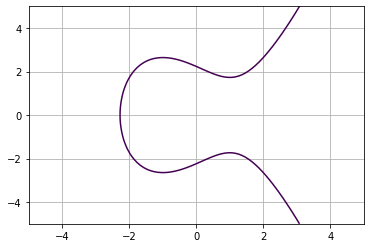

In [16]:
y, x = np.ogrid[-5:5:100j, -5:5:100j]
plt.contour(x.ravel(), y.ravel(), pow(y, 2) - pow(x, 3) - x * a - b, [0])
plt.grid()
plt.show()

here is an animation

In [17]:
y, x = np.ogrid[-5:5:100j, -5:5:100j]
#play with the limits of a and b
a = np.linspace(-10, 10, 300) 
b = np.linspace(-10, 10, 300)

fig = plt.figure()
#get the line
lines = plt.plot([])
line = lines[0]

#other setup
plt.xlim(-5, 5)
plt.ylim(-5, 5)

#animate functions
def animate(frame):
    fig.clear()
    plt.contour(x.ravel(), y.ravel(), pow(y, 2) - pow(x, 3) - x * a[frame] - b[frame], [0])

#call this to animate 
anim = FuncAnimation(fig, animate, frames =300, interval = 16.6)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html) #draws the display
plt.close()

take a desmos example too

https://www.desmos.com/calculator/ialhd71we3

## Addition

Let $E$ be an elliptic curve. Let $P$,$Q$ $\in E$  
Then $E \cap L = \{P, Q, R\};$  
If$ \ R=(a, b) => P+Q=R' = -R = (a, -b)$  
$P-P = O$, $O$ is a point on every vertical line and acts as the 0 in this addition

for a visualisation of $O$: 
https://www.youtube.com/watch?v=Hk0Fr-k7wmQ&list=PLN9KZDpNfsHMd7d7PX87JGesGY_Qzyb3V&index=7


In [18]:
(1, 2) == (1, 2)

True

In [19]:
def elliptic_sum(P1, P2):
    '''Let a point P = (x, y); let O = (0, np.inf)'''
    x_1, y_1= P1
    x_2, y_2 = P2
    if(y_1 == np.inf):
        return P2
    elif(y_2 == np.inf):
        return P1
    elif(x_1 == x_2 and y_1 == -y_2):
        return (0, np.inf) #this is O
    else:
        lam = (y_2 - y_1)/(x_2 - x_1) if P1 != P2 else (3*(x_1**2) + a) / (2*y_1)
        x_3 = lam**2 - x_1 - x_2
        y_3 = lam*(x_1 - x_3) - y_1
        return (x_3, y_3)
                                                         

Example

In [20]:
a = -3
b = 5
y, x = np.ogrid[-5:5:100j, -5:5:100j]
z = pow(y, 2) - pow(x, 3) - x * a - b



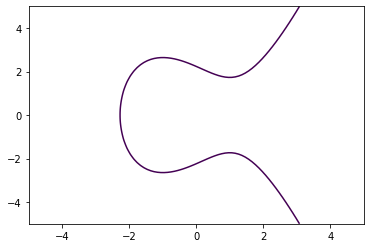

In [21]:
plt.contour(x.ravel(), y.ravel(), pow(y, 2) - pow(x, 3) - x * a - b, [0])

In [22]:
P1 = (-2.1, pow(pow(-2.1, 3) + -2.1*a + b, .5))
P2 = (.2, pow(pow(.2, 3) + .2*a + b, .5))
P3 = elliptic_sum(P1, P2)
P3_temp = (P3[0], -P3[1])

In [23]:
P1, P2, P3, P3_temp

((-2.1, 1.427935572776307),
 (0.2, 2.099523755521713),
 (1.985260999471319, -2.620810794809187),
 (1.985260999471319, 2.620810794809187))

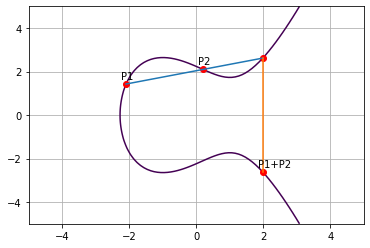

In [24]:
#plot the points
plt.plot(*P1, 'ro')
plt.annotate('P1', xy=P1, xytext=(-5, 5), textcoords='offset points')
plt.plot(*P2, 'ro')
plt.annotate('P2', xy=P2, xytext=(-5, 5), textcoords='offset points')
plt.plot(*P3, 'ro')
plt.annotate('P1+P2', xy=P3, xytext=(-5, 5), textcoords='offset points')
plt.plot(*P3_temp, 'ro')

#plot the lines
plt.plot([P1[0], P3_temp[0]], [P1[1], P3_temp[1]],)
plt.plot([P3[0], P3_temp[0]], [P3[1], P3_temp[1]],)
#plot the curve
plt.grid()
plt.contour(x.ravel(), y.ravel(), pow(y, 2) - pow(x, 3) - x * a - b, [0])

# Classes

Before we continue let's make some classes

In [76]:
class Point(object):
    ''' 
    a point on a curve
    we consider the ideal to be (np.inf, np.inf)
    '''
    def __init__(self, curve, x, y):
        self.curve = curve #the elliptic curve containing the point
        self.x, self.y = x, y
        
        if not curve.test_point(x, y):
            raise Exception("The point %s is not on the given curve %s" %(self, curve))
    
    def __neg__(self):
        return Point(self.curve, self.x, -self.y)
    
    def __eq__(self, other):
        if(self.curve == other.curve and self.x == other.x and self.y == other.y):
            return True
        else:
            return False
        
    def __add__(self, other):
        if(self.x == np.inf or self.y == np.inf):
            return other
        elif(other.x == np.inf or other.y == np.inf):
            return self
        elif(self.x == other.x and self.y == -other.y):
            return Point(self.curve, np.inf, np.inf)
        else:
            lam = (other.y - self.y)/ (other.x - self.x) if self!=other else (3*(self.x ** 2) + self.curve.a) / (2*self.y)
            x_3 = lam**2 - self.x - other.x
            y_3 = lam*(self.x - x_3) - self.y
        
        return Point(self.curve, x_3, y_3)
    
    def __sub__(self, other):
        return self + - other
            
    def __str__(self):
        return ("(%s, %s)" % (self.x, self.y))
    
    def __mul__(self, n):
        if not isinstance(n, int):
            raise Exception ("can't scale if n isnt integer")
        else:
            if n<0:
                return -self * -n
            if n == 0:
                return Point(self.curve, np.inf, np.inf)
            else:
                Q = self
                R = self if n & 1 == 1 else Point(self.curve, np.inf, np.inf)
                
                i = 2
                while i<=n:
                    Q = Q + Q
                    if n & i == i:
                        R = Q + R
                    i = i << 1
        return R
    def __rmul__(self, n):
        return self * n
                    
                
        
    
        
    

In [77]:
class EllipticCurve(object):
    def __init__(self, a, b):
        '''
        input a and b for the y^2 = x^3 + ax + b form
       
        '''
        
        self.a = a
        self.b = b
        
        self.discriminant = 4 * pow(a, 3) + 27 * pow(b, 2)
        if not self.is_smooth():
            raise Exception("the curve %s is not smooth!" % self)
        
    def is_smooth(self):
        return self.discriminant!=0
    def test_point(self, x, y):
        return pow(y, 2) == pow(x, 3) + self.a * x + self.b
    def __str__(self):
        return ('y^2 = x^3 + %Gx + %G' %(self.a, self.b))
    def __eq__(self, other):
        return (self.a, self.b) == (other.a, other.b)

In [78]:
c = EllipticCurve(a = 1, b = 2)
b = Point(c, 1, 2)
a = Point(c, 1, 2)

In [79]:
print(10 * a)

(-1.0, 0.0)


In [80]:
a - b

In [30]:
#EllipticCurve(0, 0)

# Elliptic curves over finite fields

Let $p \geq 3 \ $Then $ E: \ Y^2 = X^3 + AX + B $ where$ A,B \ \in \  \mathbb{F}_p$

In [16]:
from Crypto.Util.number import inverse

## Redefine the classes with mod p in mind 

In [11]:
def modular_sqrt(a, p):

    def legendre_symbol(a, p):
        """ Compute the Legendre symbol a|p using
            Euler's criterion. p is a prime, a is
            relatively prime to p (if p divides
            a, then a|p = 0)
            Returns 1 if a has a square root modulo
            p, -1 otherwise.
        """
        ls = pow(a, (p - 1) // 2, p)
        return -1 if ls == p - 1 else ls

    """ Find a quadratic residue (mod p) of 'a'. p
        must be an odd prime.
        Solve the congruence of the form:
            x^2 = a (mod p)
        And returns x. Note that p - x is also a root.
        0 is returned is no square root exists for
        these a and p.
        The Tonelli-Shanks algorithm is used (except
        for some simple cases in which the solution
        is known from an identity). This algorithm
        runs in polynomial time (unless the
        generalized Riemann hypothesis is false).
    """
    # Simple cases
    #
    if legendre_symbol(a, p) != 1:
        return 0
    elif a == 0:
        return 0
    elif p == 2:
        return p
    elif p % 4 == 3:
        return pow(a, (p + 1) // 4, p)

    # Partition p-1 to s * 2^e for an odd s (i.e.
    # reduce all the powers of 2 from p-1)
    #
    s = p - 1
    e = 0
    while s % 2 == 0:
        s //= 2
        e += 1

    # Find some 'n' with a legendre symbol n|p = -1.
    # Shouldn't take long.
    #
    n = 2
    while legendre_symbol(n, p) != -1:
        n += 1

    # Here be dragons!
    # Read the paper "Square roots from 1; 24, 51,
    # 10 to Dan Shanks" by Ezra Brown for more
    # information
    #

    # x is a guess of the square root that gets better
    # with each iteration.
    # b is the "fudge factor" - by how much we're off
    # with the guess. The invariant x^2 = ab (mod p)
    # is maintained throughout the loop.
    # g is used for successive powers of n to update
    # both a and b
    # r is the exponent - decreases with each update
    #
    x = pow(a, (s + 1) // 2, p)
    b = pow(a, s, p)
    g = pow(n, s, p)
    r = e

    while True:
        t = b
        m = 0
        for m in range(r):
            if t == 1:
                break
            t = pow(t, 2, p)

        if m == 0:
            return x

        gs = pow(g, 2 ** (r - m - 1), p)
        g = (gs * gs) % p
        x = (x * gs) % p
        b = (b * g) % p
        r = m

In [12]:
class EllipticCurveFp(object):
    def __init__(self, a, b, p):
        '''
        input a and b for the y^2 = x^3 + ax + b form
       
        '''
        self.a = a % p
        self.b = b % p 
        self.p = p
        
        self.discriminant = -16*(4 * pow(a, 3, p) + 27 * pow(b, 2, p)) % p
        if not self.is_smooth():
            raise Exception("the curve %s is not smooth!" % self)
        
    def is_smooth(self):
        return self.discriminant!=0
    
    def test_point(self, x, y):
        return pow(y, 2, self.p) == ((pow(x, 3, self.p) + self.a * x + self.b ) % self.p)
    
    def get_all_points(self):
        '''gets points WITHOUT the ideal. The ideal is coded as (np.inf, np.inf)'''
        all_points = list()
        all_points.append(PointFp(self, 0, 1, 0))
        for x in range(self.p):
            y_sq =  (pow(x, 3, self.p) + self.a * x + self.b ) % self.p
            y = modular_sqrt(y_sq, self.p)
            if  y != 0: #0 is when no root exists
                all_points.append(PointFp(self, x, y))
                all_points.append(PointFp(self, x, self.p-y))
        return all_points
        
    def __str__(self):
        return ('y^2 = x^3 + %Gx + %G mod %G' %(self.a, self.b, self.p))
    def __eq__(self, other):
        return (self.a, self.b, self.p) == (other.a, other.b, other.p)

In [13]:
class PointFp(object):
    ''' 
    a point on a curve
    for any point that is not the ideal z = 1
    we consider the ideal to have x = 0, y = 1, z = 0
    '''
    def __init__(self, curve, x, y, z = 1):
        if z == 1:
            self.curve = curve #the elliptic curve containing the point
            self.x, self.y = x % curve.p, y % curve.p
            self.z = z
            if not curve.test_point(self.x, self.y):
                raise Exception("The point %s is not on the given curve %s" %(self, curve))
        else:
            self.x, self.y, self.z = x, y, z
            self.curve = curve


    def __neg__(self):
        return PointFp(self.curve, self.x, -self.y % self.curve.p)
    
    def __eq__(self, other):
        if(self.curve == other.curve and self.x == other.x and self.y == other.y):
            return True
        else:
            return False
        
    def __add__(self, other):
        if(self.z!=1):
            return other
        elif(other.z!=1):
            return self
        elif(self.x == other.x and self.y == -other.y % self.curve.p):
            return PointFp(self.curve, 0, 1, 0)
        else:
            #doubling
            if self == other:
                num = (3*pow(self.x, 2) + self.curve.a)
                denom = (2*self.y)
                gcd_temp = gcd(denom, self.curve.p)
                if gcd_temp !=1:
                    return PointFp(self.curve, 0, 0, denom)
                else:
                    lam = num * inverse(denom, self.curve.p)
            else :
                num = (self.y - other.y)
                denom = (self.x - other.x)
                gcd_temp = gcd(denom, self.curve.p)
                if gcd_temp !=1:
                    return PointFp(self.curve, 0, 0, denom)
                else:
                    lam =  num * inverse(denom, self.curve.p)
            x_3 = (lam**2 - self.x - other.x) % self.curve.p
            y_3 = (lam*(self.x - x_3) - self.y) % self.curve.p
            return PointFp(self.curve, x_3, y_3)
    
    def __sub__(self, other):
        return self + - other
            
    def __str__(self):
        return ("(%s, %s, %s)" % (self.x, self.y, self.z))
    
    def __mul__(self, n):
        n = n % self.curve.p
        if not isinstance(n, int):
            raise Exception ("can't scale if n isnt integer")
        else:
            if n == 0:
                return PointFp(self.curve, 0, 1, 0)
            else:
                Q = self
                R = self if n & 1 == 1 else PointFp(self.curve, 0, 1, 0)
                i = 2
                while i<=n:
                    Q = Q + Q
                    if n & i == i:
                        R = Q + R
                    i = i << 1 
        return R 
    def __rmul__(self, n):
        return self * n 
    
    def __hash__(self):
        return hash(str(self))


In [54]:
curve = EllipticCurveFp(3, 8, 13)

In [55]:
set_13  = curve.get_all_points()

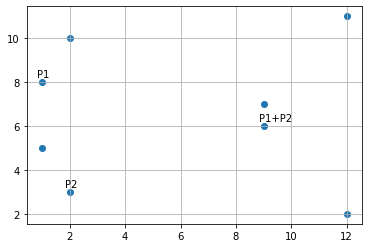

In [61]:
x = [elem.x for elem in set_13 if elem.z == 1]
y = [elem.y for elem in set_13 if elem.z == 1]
P1 = set_13[1]
P2 = set_13[3]
P3 = P1 + P2
P3_temp = -P3
plt.grid()
plt.scatter(x, y)

#plt.plot(*P1, 'ro')
plt.annotate('P1', xy=(P1.x, P1.y), xytext=(-5, 5), textcoords='offset points')
#plt.plot(*P2, 'ro')
plt.annotate('P2', xy=(P2.x, P2.y), xytext=(-5, 5), textcoords='offset points')
#plt.plot(*P3, 'ro')
plt.annotate('P1+P2', xy=(P3.x, P3.y), xytext=(-5, 5), textcoords='offset points')
plt.show()



check this notebook for plots, i'm way too lazy to do this  
basically the line that goes through P1 and P2 wraps arround until it hits a point. Reflect that point to get P1 + P2
https://github.com/fangpenlin/elliptic-curve-explained/blob/master/elliptic-curve-on-finite-field.ipynb

In [62]:
list(zip(x, y))

[(1, 8), (1, 5), (2, 3), (2, 10), (9, 7), (9, 6), (12, 11), (12, 2)]

In [63]:
print(set_13[0] + set_13[1]), print(set_13[0] + set_13[2])

(1, 8, 1)
(1, 5, 1)


(None, None)

In [64]:
len(set_13)

9

In [65]:
for i in range(26):
    print(i, i * set_13[1])

0 (0, 1, 0)
1 (1, 8, 1)
2 (2, 3, 1)
3 (9, 6, 1)
4 (12, 11, 1)
5 (12, 2, 1)
6 (9, 7, 1)
7 (2, 10, 1)
8 (1, 5, 1)
9 (0, 1, 0)
10 (1, 8, 1)
11 (2, 3, 1)
12 (9, 6, 1)
13 (0, 1, 0)
14 (1, 8, 1)
15 (2, 3, 1)
16 (9, 6, 1)
17 (12, 11, 1)
18 (12, 2, 1)
19 (9, 7, 1)
20 (2, 10, 1)
21 (1, 5, 1)
22 (0, 1, 0)
23 (1, 8, 1)
24 (2, 3, 1)
25 (9, 6, 1)


In [34]:
a = 64186688762130075872648727143532923412208390610536286437268423112
b = 32579945572763798990069104934898692239152360555014084068553395172709029894
p = 4368590184733545720227961182704359358435747188309319510520316493183539079703

In [35]:
EllipticCurveFp(a, b, p)

Exception: the curve y^2 = x^3 + 6.41867E+64x + 3.25799E+73 mod 4.36859E+75 is not smooth!

# Elliptic Curve Discrete Logarithm Problem ( ECDLP)

Let $E$ be an elliptic curve over the finite field $\mathbb{F}_p$ and let $P$ and $Q$ be points in $E(\mathbb{F}_p)$.  

The **Elliptic Curve Discrete Logarithm Problem**(ECDLP) is the problem of finding an integer $n$ such that $Q=nP$.  
By analogy with the discrete logarithm problem for $\mathbb{F}^*_p$, we denote this integer $n$ by

$n= \log_P(Q)$

and we call $n$ the elliptic discrete logarithm of $Q$ with respect to $P$

In [66]:
#example
E_73= EllipticCurveFp(8, 7, 73)

In [67]:
P = PointFp(E_73, 32, 53)
Q = PointFp(E_73, 39, 17)

In [69]:
11 * P == Q

True

In [70]:
points_E_73 = E_73.get_all_points()

In [71]:
len(points_E_73)

81

# Elliptic DH Key exchange

Public parameters:  
* large prime $p, E(\mathbb{F}_p), P \in E(\mathbb{F}_p)$

Private computations:  
* A : choose secret $n_A => Q_A = n_A * P $  
* B : choose secret $n_B => Q_B = n_B * P $

Exchange $Q_A, Q_B$

Shared secret: 
* $n_A Q_B = n_A n_B P = n_B Q_A $

In [72]:
#public parameters
p = 3851
E = EllipticCurveFp(324, 1287, p)
P = PointFp(E, 920, 303)

In [73]:
#Private
n_A = 1194
n_B = 1759
Q_A = n_A * P
Q_B = n_B * P

In [74]:
#shared secret
n_A * Q_B == n_B * Q_A

True

# Elliptic Elgamal

Public parameters:  
* large prime $p, E(\mathbb{F}_p), P \in E(\mathbb{F}_p)$

Key creation:
* Choose $n_A$
* Compute $Q_A = n_A * P \in E(\mathbb{F}_P)$
* Publish $Q_A$

Encryption
* Choose plaintext $M \in E(\mathbb{F}_p)$
* Choose random element k
* $C_1 = kP \in E(\mathbb{F}_p)$
* $C_2 = M + kQ_a \in E(\mathbb{F}_p)$
* send $(C_1, C_2)$

Decryption
* $M = C_2 - n_AC_1 \in E(\mathbb{F}_p)$

Disadvantages -> 4-1 message expansion ( C1, C2 -> x and y for each), we have a limited number of points and coords

# Elliptic curves signatures

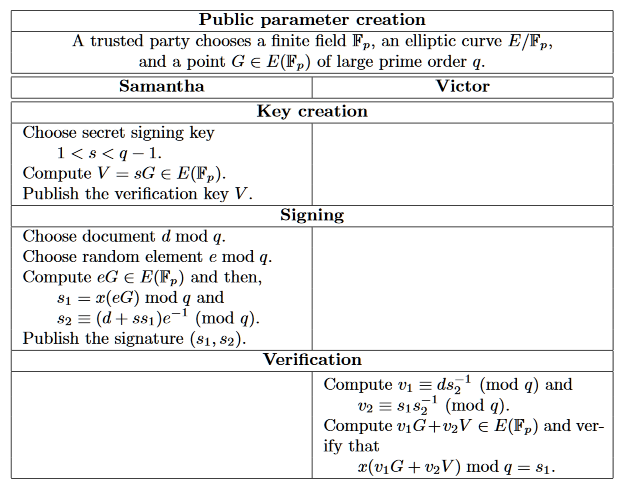

Similar to the basic one  
Verification step:  
$v_1 G + v_2V = ds^{-1}_2G + s_1 s^{-1}_2 (sG) = (d + ss_1)s^{-1}_2 G = (e s_2)s^{-1}_2 G = eG \in E(\mathbb{F}_p)$

Hence:  
$x(v_1G + v_2V) mod \ q = x(eG) mod \ q = s_1$




# Lenstra's EC Factorization ALgorithm

we work on EC modulo non-prime $N$

In [6]:
import random

In [7]:
random.randint(0, 100)

15

In [20]:
n = 6887

In [21]:
def LenstraFactorizationEC(N):
    #select random values A, x_p, y_p
    while True:
        A = random.randint(0, max(10, N-1//10))
        x_p = random.randint(0, N-1)
        y_p = random.randint(0, N-1)
        #     A = 14
        #     x_p = 1512
        #     y_p = 3166

        #compute B 
        B = (pow(y_p, 2, N) - pow(x_p, 3, N) - A * x_p) % N

        #set the elliptic curve and the point
        E = EllipticCurveFp(A, B, N)
        P = PointFp(E, x_p, y_p)
        j = 2
        while True: #or to a specific bound
            Q = j * P
            #print('Q = ', Q)
            if Q.z != 1 and Q.z!=0:
                #we found the denominator that can't be inverted
                d = Q.z
                gcd_temp = gcd(d, N)
                if gcd_temp < N:
                    return gcd_temp
                else: 
                    break #if it fails choose another curve
            P = Q
            j+=1
        
    

In [29]:
print(LenstraFactorizationEC(n))
print(LenstraFactorizationEC(26167))
print(LenstraFactorizationEC(28102844557))
#print(LenstraFactorizationEC(4368590184733545720227961182704359358435747188309319510520316493183539079703 - 1))

97
137
238639


# Elliptic curves over $\mathbb{F}_2$ and over $\mathbb{F}_{2^k}$

Reminder:
    
let $p$ be a prime number => $\exists !$ a finite field $\mathbb{F}_{p^k}$

Ex: $S = \{f | f(x) = \sum^{n-1}_{i=0} a_i * x^i ; a_i \in \mathbb{Z}_p \} => |Z| = p^n$

Let $m \in \mathbb{F}[x]$ be a irreductible polynomial => $\mathbb{F}[x]/m $ is a finite field

All finite fields of a given order(size) are isomoprphic

https://engineering.purdue.edu/kak/compsec/NewLectures/Lecture7.pdf

## Generalized Weierstrass equation

$E : Y^2 + a_1XY + a_3Y = X^3 + a_2X^2 + a_4X + a_6$ with the point $O$

$\Delta = −b_2^2b_8−8b^3_4−27b^2_6+9b_2b_4b_6$ where  

$ b_2=a_1^2+4a_2; \\
b_4=2a_4+a_1a_3;  \\
b_6=a_3^2+4a_6;   \\
b_8=a_1^2a_6+4a_2a_6−a_1a_3a_4+a_2a_3^2−a_4^2$


Reflection: $(x, y) \to (x, -y-a_1x-a_3)$  

Addition:  
$x(P1+P2) = \lambda^2 - a_1\lambda - a_2 - x_1 - x_2$  
$x(2P) = \frac{x^4 - b_4x^2 - 2b_6x - b_8}{4x_3 + b_2x^2 + 4b_4x + b_6} $

In [3]:
# to be implemented if you want to 

**Frobenius map**  
$\tau : \mathbb{F}_{p^k} \to \mathbb{F}_{p^k}, \ \ \alpha \to \alpha^p$

Proprieties:
* $\tau(\alpha + \beta )= \tau(\alpha) + \tau(\beta)$
* $\tau(\alpha * \beta) = \tau(\alpha) * \tau(\beta) $

If $P = (x, y)$ and we define $\tau(P) = (\tau(x), \tau(y))$ then 
* $\tau(P) \in E(\mathbb{F}_{p^k})$
* $\tau(P + Q) = \tau(P) + \tau(Q) $



**Theorem**  
Let $E$ be an elliptic curve over $\mathbb{F}_p$ and let  
$t = p + 1 − |E(\mathbb{F}_p)|$  
Notice that Hasse’s theorem says that $|t| ≤ 2\sqrt{p}$.  

* Let $\alpha$ and $\beta$ be the complex roots of the quadratic polynomial $Z^2 − tZ + p$.  
Then $|α|=|β|=\sqrt{p}$, and for every $k≥1$ we have $|E(\mathbb{F}_{p^k})|=p^k + 1 − αk − βk$.  

* Let $τ:E(\mathbb{F}_{p^k})→E(\mathbb{F}_{p^k}), \ (x, y) → (x^p,y^p)$ ,be the Frobenius map.  
Then for every point $Q ∈ E(\mathbb{F}_{p^k})$ we have $τ^2(Q) − t·τ(Q) + p·Q = O$ ,where $τ^2(Q)$ denotes the compositionτ$(τ(Q))$.

*Koblitz curve*   
$E_a = Y^2 + XY = X^3 + aX^2 + 1$ over $\mathbb{F}_2$; $\Delta = 1$



*Efficiency*  
from theabove theorem we get:  
$τ^2(P) + τ(P) + 2P = O $ for all $P∈E(\mathbb{F}_{p^k})$. 

The idea now is to write an arbitrary integer $n$ as a sum of powers of $τ$ , subject to the assumption that $τ^2=−2 − τ$.  Say we have written $n$ as $n=v_0+v_1τ+v_2τ^2+ ··· + v_lτ^l $ with $v_i∈\{−1,0,1\}$ .

Then we can compute $nP$ efficiently using the formula  
$nP = (v_0 + v_1τ + v_2τ^2 +···+ v_lτ^l)P = v_0 P +v_1τ(P) + v_2τ^2(P) +···+ v_lτ^l(P)$.

which takes less time because its easier to compute $\tau^i(P)$ than $2^i(P)$ 

# pairings, Weil pairings, Tate pairings, MOV algorithm

# Menezes–Vanstone variant of Elgamal